# 8. Neural Networks and Deep Learning

This week, we will learn about neural networks and how to build a model for clothing classifier.

## 8.1 Fashion classification

Get the Dataset:
- Full (~322MB): https://github.com/alexeygrigorev/clothing-dataset
- Subset (~212MB): https://github.com/alexeygrigorev/clothing-dataset-small

Links:
- https://cs231n.github.io/

In [10]:
!git clone https://github.com/alexeygrigorev/clothing-dataset.git
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset'...
remote: Enumerating objects: 5792, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 5792 (delta 13), reused 3 (delta 1), pack-reused 5766
Receiving objects: 100% (5792/5792), 152.92 MiB | 40.43 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 41.21 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 8.2 Tensorflow and Keras

- Installing Tensorflow
- Loading Images

In [11]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [12]:
# !pip install tensorflow[and-cuda]

In [13]:
import tensorflow as tf
from tensorflow import keras

print("GPUs: ", len(tf.config.list_physical_devices('GPU')))

GPUs:  1


**Loading image-data**

In [14]:
# Works for TensorFlow >= 2.0
from tensorflow.keras.preprocessing.image import load_img

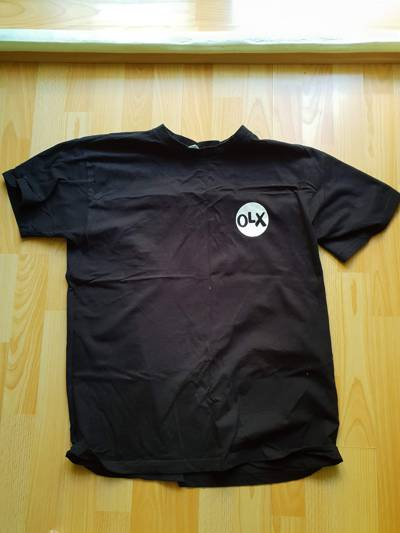

In [15]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_path = f"{path}/{name}"
load_img(full_path)

Resizing of images is often required, since many Neural Networks require inputs of a certain size:

In [ ]:
img = load_img(full_path, target_size=(299, 299))

In [ ]:
# The loaded and resized image is in PIL-format
print(img)

The Image is 3-channel RGB-image (red, green, blue)

In [ ]:
print(img.size, img.mode)

Converting PIL-Image to numpy array

In [ ]:
x = np.array(img)
print(x.shape)
x # each row is a pixel with (R,G,B) color values

## 8.3 Pre-trained Convoluational Neural Networks (CNNs)

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [40]:
# Good tradeoff between speed and size of model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
size = (299, 299, 3)
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 3s 0us/step


Testing the pre-trained neural network with the shirt:

In [ ]:
X = x[None, ...]
X = preprocess_input(X)
pred = model.predict(X) # requires pre-processing to work properly

1/1 [==============================] - 9s 9s/step


In [ ]:
print("Imagnet-scores:", pred.shape) # Imagenet has 1000 classes
top_scores = decode_predictions(pred)[0]
print(f"Top-{len(top_scores)} Scores:")
for score in top_scores:
    print(score)

Imagnet-scores: (1, 1000)
35363/35363 [==============================] - 0s 0us/step
Top-5 Scores:
('n03595614', 'jersey', 0.681964)
('n02916936', 'bulletproof_vest', 0.038139928)
('n04370456', 'sweatshirt', 0.03432469)
('n03710637', 'maillot', 0.01135421)
('n04525038', 'velvet', 0.0018453539)


## 8.4 Convolutional Neural Networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

See [README](../README.md#04-conv-neural-nets) for more information.

## 8.5 Transfer Learning

- Reading data with `ImageDataGenerator`
- Train `Xception` on smaller images $150\times150$

(Better to run it with a GPU)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

Setting up training-data for fine-tuning with the following parameter:
- `target_size`: Size of input images
- `batch_size`: How many images are processed at once

In [ ]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32,
    shuffle=True
)

Found 3068 images belonging to 10 classes.


In [ ]:
# A helper function for visualization
def invDict(d):
    return {v: k for k, v in d.items()}

# Looking into the dataset
train_ds.class_indices
# Class-names were inferred from the folder-stucture

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
# Getting a sample from the dataset
X, y = next(train_ds)

Looking into how the data is represented / encoded and what it means:

In [ ]:
print(X.shape, y.shape)
print(y[:5]) # one-hot encoding

for i in range(5):
    y_i = y[i].argmax()
    cls_i = invDict(train_ds.class_indices)[y_i]
    print(f"y[{i}] = {y[i]} -> {y_i} -> {cls_i}")

(32, 150, 150, 3) (32, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y[0] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> 9 -> t-shirt
y[1] = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> 0 -> dress
y[2] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] -> 5 -> shirt
y[3] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> 9 -> t-shirt
y[4] = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> 4 -> pants


Creating the Validation-Dataset:

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation/",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False # just for eval. -> no shuffling needed
)

Found 341 images belonging to 10 classes.


**Loading the `Base`-model**
- `Base- of Bottom-model`: the CNN
- `Top-model`: the dense-layer part of the overall model

In [ ]:
base_model = Xception(
    weights="imagenet",
    include_top=False, # excluding dense-part
    input_shape=(150, 150, 3)
)

# fix / freeze the base-model
base_model.trainable = False

83683744/83683744 [==============================] - 3s 0us/step


### Creating and testing a Keras Model

![transfer3](../imgs/transfer_3.jpg)

**Functional-Style of building Keras-Networks:**

In [ ]:
# `inputs` get passed to froten CNN feature-extractor
inputs = keras.Input(shape=(150, 150, 3))

# Output of the CNN
base = base_model(inputs, training=False)

# Applying average pooling to obtain 1D feature-vectors
vectors = keras.layers.GlobalAveragePooling2D()(base)

# `outputs`: feature-vectures after applying dense-layers
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
# X -> inputs, preds -> outputs
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [ ]:
preds[0] # Just some random numbers -> Dense-Layers need training

array([-0.10012913, -0.481204  , -0.40695265,  0.38708192,  0.5602261 ,
       -0.65650254,  0.5477733 , -0.9303689 ,  0.79631007, -0.30012152],
      dtype=float32)

**Training weights of the dense-layer part of the overall model**

- `Logits`: un-normalized "raw" scores that are the output of the dense-layer part of the overall model

In [ ]:
# Defining optimizer
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Defining loss function for training
loss = keras.losses.CategoricalCrossentropy(
    from_logits=True
) # for multi-class problems

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"]
)

An `epoch` in training is the nr. of times the training-algorithm iterates over the whole training-dataset.

In [ ]:
# The training itself
n_epochs = 10
history = model.fit(
    train_ds,
    epochs=n_epochs,
    validation_data=val_ds
)

Epoch 1/10
96/96 [==============================] - 16s 134ms/step - loss: 1.2403 - accuracy: 0.6780 - val_loss: 0.7639 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 9s 95ms/step - loss: 0.5268 - accuracy: 0.8328 - val_loss: 0.9221 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 9s 94ms/step - loss: 0.3826 - accuracy: 0.8713 - val_loss: 0.9719 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 10s 104ms/step - loss: 0.2884 - accuracy: 0.9016 - val_loss: 0.8732 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 9s 97ms/step - loss: 0.1865 - accuracy: 0.9329 - val_loss: 0.8643 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.1302 - accuracy: 0.9560 - val_loss: 0.8638 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 10s 102ms/step - loss: 0.0943 - accuracy: 0.9687 - val_loss: 1.1290 - val_accuracy: 0.7977
Epoch

**Lets learn from `history`!**

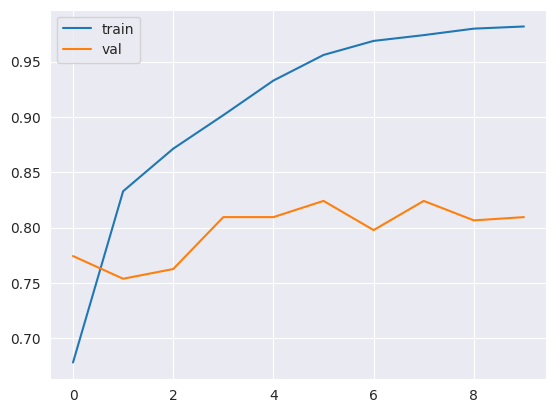

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

**Observations:**
- The accuracy of the training data reaches $\approx 1$
- The accuracy of the validation data oscillates around $0.8$
- The model starts to overfit after 2 iterations

What can be done to get a better consistency between train and validation accuracy?
- Fine tune hyper parameters like the learning rate!

## 8.6 Adjust the learning rate

- What's the learning rate
- Trying different values

In [ ]:
def make_model(learning_rate=0.1):

    base_model = Xception(
        weights="imagenet",
        include_top=False, # excluding dense-part
        input_shape=(150, 150, 3)
    )

    # fix / freeze the base-model
    base_model.trainable = False

    #######################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"lr = {lr}")
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print("\n\n")

lr = 0.0001


Epoch 1/10
96/96 [==============================] - 11s 90ms/step - loss: 1.8955 - accuracy: 0.3706 - val_loss: 1.6341 - val_accuracy: 0.4809
Epoch 2/10
96/96 [==============================] - 8s 85ms/step - loss: 1.3685 - accuracy: 0.5642 - val_loss: 1.2766 - val_accuracy: 0.6070
Epoch 3/10
96/96 [==============================] - 8s 85ms/step - loss: 1.1274 - accuracy: 0.6392 - val_loss: 1.0933 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 8s 84ms/step - loss: 0.9902 - accuracy: 0.6861 - val_loss: 0.9823 - val_accuracy: 0.6950
Epoch 5/10
96/96 [==============================] - 8s 86ms/step - loss: 0.8976 - accuracy: 0.7145 - val_loss: 0.9110 - val_accuracy: 0.7155
Epoch 6/10
96/96 [==============================] - 8s 85ms/step - loss: 0.8318 - accuracy: 0.7285 - val_loss: 0.8509 - val_accuracy: 0.7361
Epoch 7/10
96/96 [==============================] - 8s 84ms/step - loss: 0.7810 - accuracy: 0.7451 - val_loss: 0.8121 - val_accuracy: 0.7537
Epoch 8/10
9

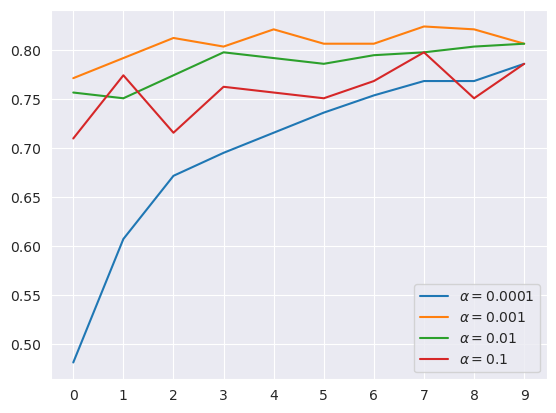

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=r"$\alpha = $" + str(lr))
plt.xticks(np.arange(10))
plt.legend()
plt.savefig("../imgs/learning_rates.png")
plt.show()

- Best learning rate here is $\alpha=0.001$

In [ ]:
del scores[0.1]
del scores[0.0001]

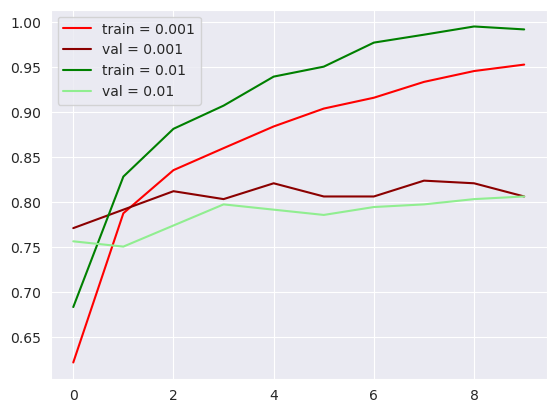

In [ ]:
# Comparing Train- and Validation-Accuracy (only 0.01, 0.001)a

- $\alpha=0.001$ has the smaller gap between train- and validation-accuracy, thus generalizing reasonably good.

## 8.7 Checkpointing

- Saving the model only
- Training the model with callbacks

### Saving the model only

In [ ]:
# Simply saving the model with a given name in specified format
model.save_weights("model_v1.h5", save_format="h5")
%ls *.h5

model_v1.h5


### Training the model with callbacks

Callback that saves a model-checkpoint when `val_accuracy` is maximized (bigger than prev. max-value of specified metric):

In [ ]:
ckpt_name = "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5".format(epoch=12, val_accuracy=0.82423423)
print(ckpt_name)


checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,    # only saves when model / monitored metric improves
    monitor="val_accuracy", # metric to monitor
    mode="max"              # what should be done with metric
)

xception_v1_12_0.824.h5


Training the model while utilizing the callback-function:

In [ ]:
lr = 0.001
model = make_model(learning_rate=lr)
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0847 - accuracy: 0.6408

/home/user22/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 11s 95ms/step - loss: 1.0847 - accuracy: 0.6408 - val_loss: 0.7256 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 8s 87ms/step - loss: 0.6318 - accuracy: 0.7846 - val_loss: 0.6522 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 8s 86ms/step - loss: 0.5119 - accuracy: 0.8227 - val_loss: 0.6159 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 8s 85ms/step - loss: 0.4311 - accuracy: 0.8559 - val_loss: 0.5948 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 8s 85ms/step - loss: 0.3714 - accuracy: 0.8866 - val_loss: 0.5570 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 8s 87ms/step - loss: 0.3359 - accuracy: 0.8990 - val_loss: 0.5535 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 8s 86ms/step - loss: 0.2930 - accuracy: 0.9169 - val_loss: 0.5514 - val_accuracy: 0.8152
Epoch 8/10
96/96 [=====

## 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

### Adding one inner dense layer

In [ ]:
def make_model(learning_rate=0.1, size_inner=100):

    base_model = Xception(
        weights="imagenet",
        include_top=False, # excluding dense-part
        input_shape=(150, 150, 3)
    )

    # fix / freeze the base-model
    base_model.trainable = False

    #######################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model

### Experimenting with different sizes of inner layer

In [ ]:
lr = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"lr = {lr}")
    model = make_model(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print("\n\n")

lr = 0.001
Epoch 1/10
96/96 [==============================] - 14s 100ms/step - loss: 1.2942 - accuracy: 0.5815 - val_loss: 0.8794 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 10s 101ms/step - loss: 0.7839 - accuracy: 0.7419 - val_loss: 0.7229 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 10s 102ms/step - loss: 0.6449 - accuracy: 0.7810 - val_loss: 0.6633 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 11s 114ms/step - loss: 0.5562 - accuracy: 0.8171 - val_loss: 0.6323 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 9s 98ms/step - loss: 0.4800 - accuracy: 0.8455 - val_loss: 0.5916 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 10s 105ms/step - loss: 0.4283 - accuracy: 0.8638 - val_loss: 0.5831 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 9s 92ms/step - loss: 0.3773 - accuracy: 0.8849 - val_loss: 0.6143 - val_accuracy:

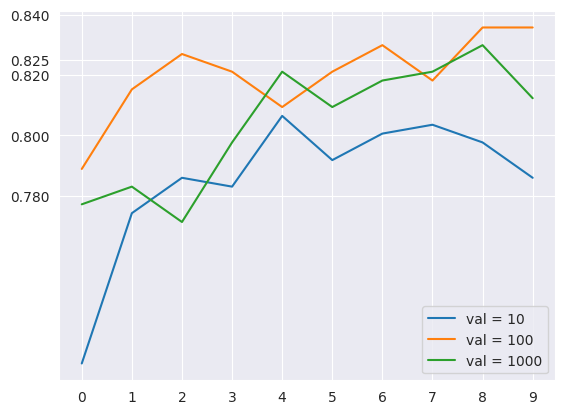

In [ ]:
# Comparing Train- and Validation-Accuracy (only 0.01, 0.001)
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val = {size}")
plt.legend()
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.84])
plt.show()

Adding an extra layer led to some improvement (`val_accuracy`$\approx0.84$) compared to the previous model (`val_accuracy`$\approx0.8$) without the extra layer. The increase of depth is reasonable here, however you should not increase the depth of a neural network too much to avoid unneeded complexity.

## 8.9 Regularization and dropout

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [47]:
def make_model(learning_rate=0.1, size_inner=100, droprate=0.5):

    base_model = Xception(
        weights="imagenet",
        include_top=False, # excluding dense-part
        input_shape=(150, 150, 3)
    )

    # fix / freeze the base-model
    base_model.trainable = False

    #######################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    # Adding dropout to the inner layer of the fully-connected part of the model
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [ ]:
# Training the model with different dropout-probabilities

lr = 0.001
size_inner = 100
epochs = 30
scores = {}
DROPRATES = [0.0, 0.2, 0.5, 0.8]

for droprate in DROPRATES:
    print(f"droprate = {droprate}")
    model = make_model(
        learning_rate=lr,
        size_inner=size_inner,
        droprate=droprate
    )
    history = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds
    )
    scores[droprate] = history.history
    print("\n\n")

droprate = 0.0
Epoch 1/30
96/96 [==============================] - 14s 104ms/step - loss: 0.9443 - accuracy: 0.6708 - val_loss: 0.5895 - val_accuracy: 0.8182
Epoch 2/30
96/96 [==============================] - 10s 99ms/step - loss: 0.4872 - accuracy: 0.8295 - val_loss: 0.5261 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 10s 102ms/step - loss: 0.3397 - accuracy: 0.8885 - val_loss: 0.6238 - val_accuracy: 0.7801
Epoch 4/30
96/96 [==============================] - 9s 95ms/step - loss: 0.2513 - accuracy: 0.9188 - val_loss: 0.5863 - val_accuracy: 0.8182
Epoch 5/30
96/96 [==============================] - 11s 111ms/step - loss: 0.1778 - accuracy: 0.9524 - val_loss: 0.5577 - val_accuracy: 0.8299
Epoch 6/30
96/96 [==============================] - 10s 103ms/step - loss: 0.1281 - accuracy: 0.9700 - val_loss: 0.5779 - val_accuracy: 0.8211
Epoch 7/30
96/96 [==============================] - 9s 90ms/step - loss: 0.0878 - accuracy: 0.9837 - val_loss: 0.5760 - val_accura

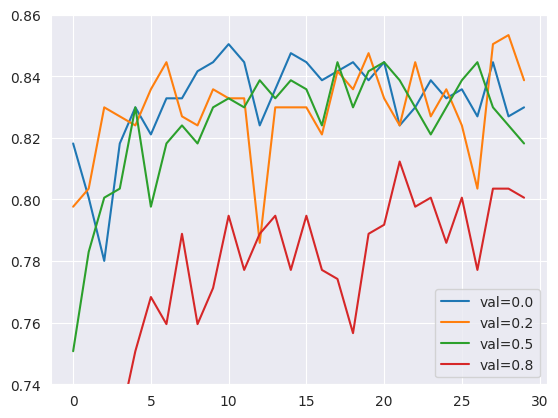

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val={droprate}")
plt.ylim(0.74, 0.86)
plt.legend()
plt.show()

Comparing the different accuracy-values:

<class 'numpy.ndarray'>


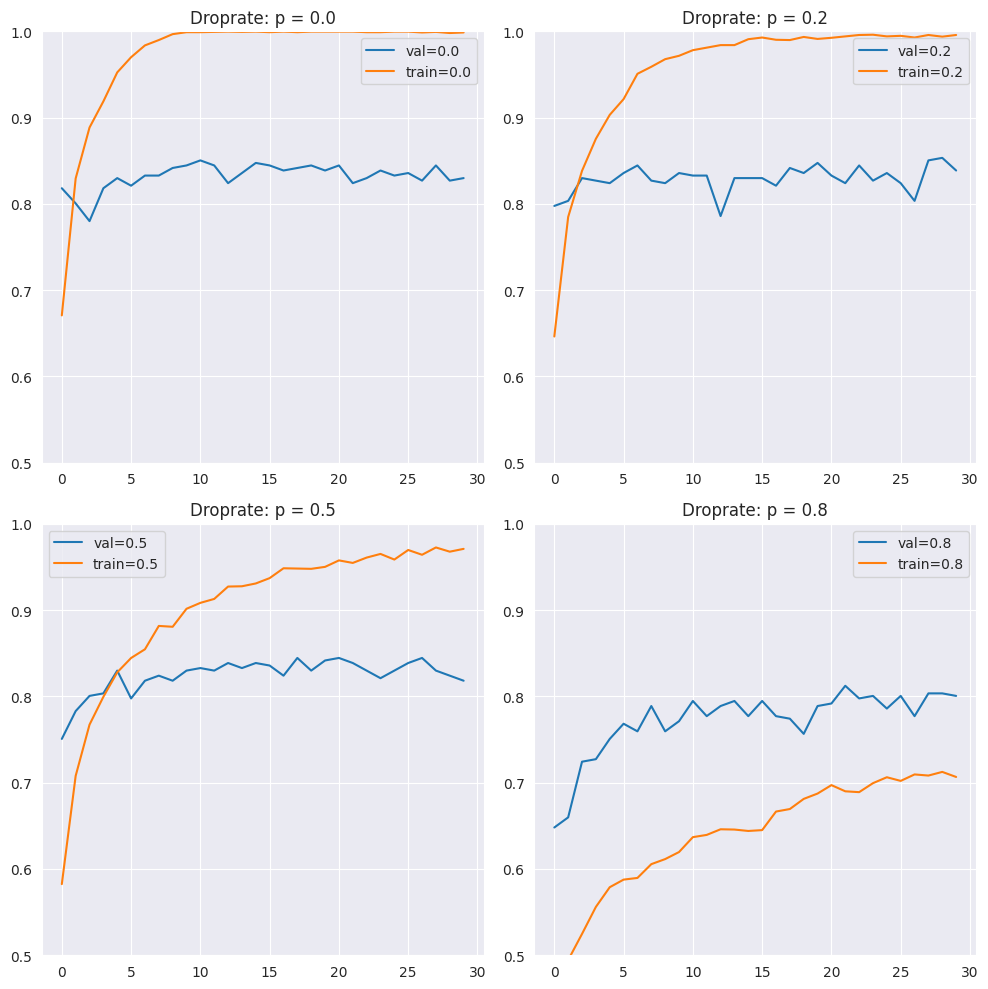

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, droprate in enumerate(scores.keys()):
    j = i//2, i%2
    hist = scores[droprate]
    ax[j].plot(hist["val_accuracy"], label=f"val={droprate}")
    ax[j].plot(hist["accuracy"], label=f"train={droprate}")
    ax[j].set_title(f"Droprate: p = {droprate:.1f}")
    ax[j].legend()
    ax[j].set_ylim(0.5, 1.0)

plt.tight_layout()
plt.show()


Validation Accuracy of the trained model given a dropout rate $p$:

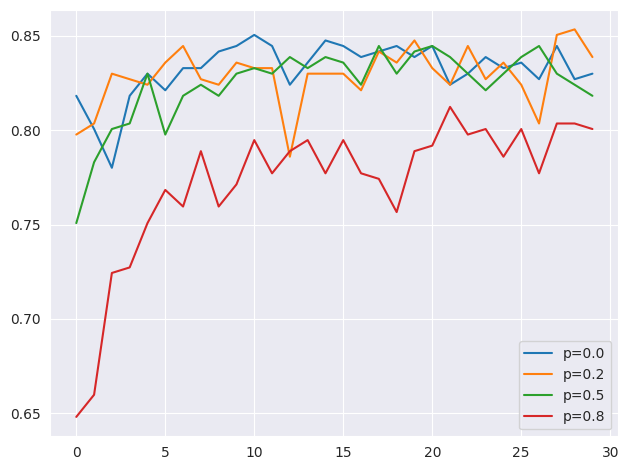

In [ ]:
for i, droprate in enumerate(scores.keys()):
    hist = scores[droprate]
    plt.plot(hist["val_accuracy"], label=f"p={droprate}")
    plt.legend()

plt.tight_layout()
plt.show()


## 8.10 Data augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [16]:
import numpy as np
import pandas as pd

from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_path = f"{path}/{name}"
image = load_img(full_path)
print(image.height, image.width, image.size)

533 400 (400, 533)


In [18]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [19]:
def augment(img,
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': width_shift,
        'ty': height_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }

    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [20]:
def show_augmentations(image, param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(image, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()

**The Original Image**

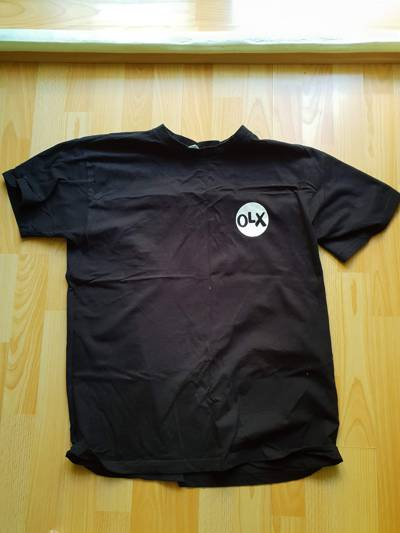

In [21]:
image

**Image-Flipping**

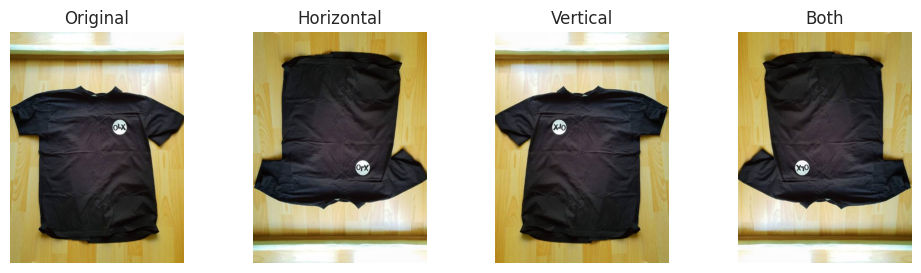

In [22]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(image))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(image, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(image, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(image, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show()

**Image-Rotation**

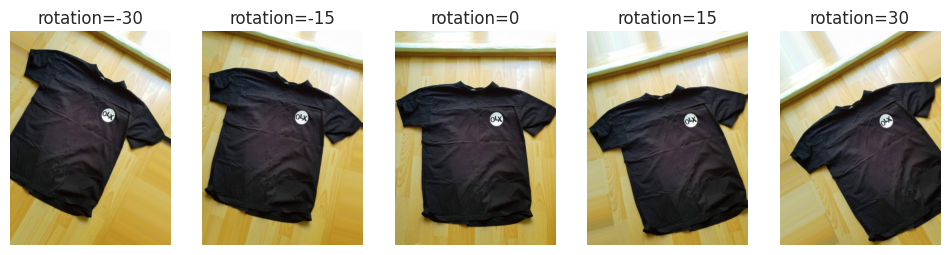

In [23]:
param = "rotation"
values = [-30, -15, 0, 15, 30] # Rotations in degrees
show_augmentations(image, param, values, (12, 3))

**Image-Shift**

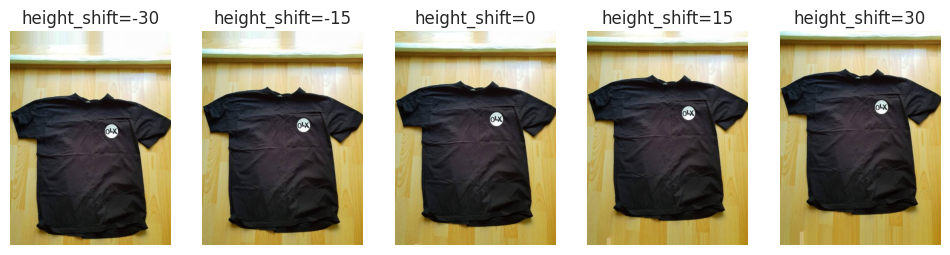

In [24]:
param = "height_shift"
values = [-30, -15, 0, 15, 30] # Shifts in % in height of image
show_augmentations(image, param, values, (12, 3))

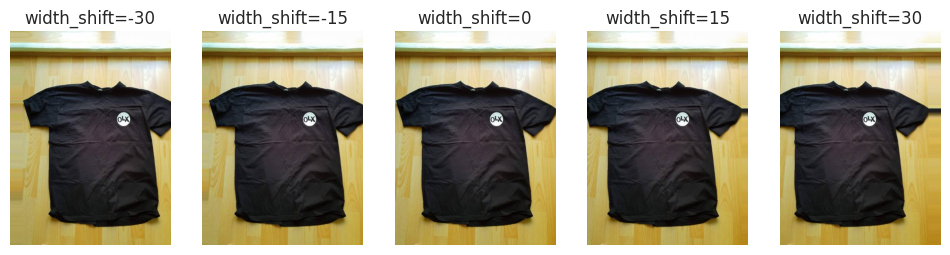

In [25]:
param = "width_shift"
values = [-30, -15, 0, 15, 30] # Shifts in % in width of image
show_augmentations(image, param, values, (12, 3))

**Image-Shear**

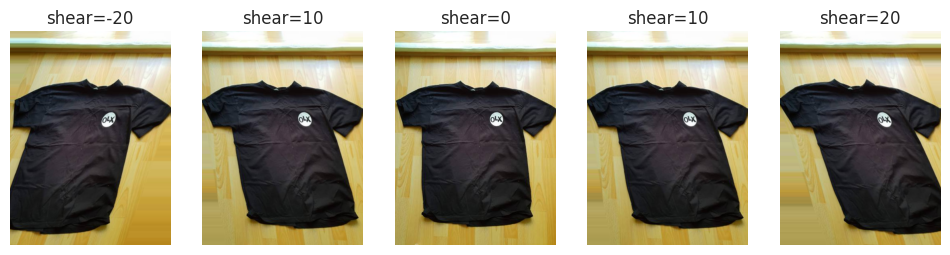

In [26]:
param = "shear"
values = [-20, 10, 0, 10, 20]
show_augmentations(image, param, values, (12, 3))

**Image-Zoom**

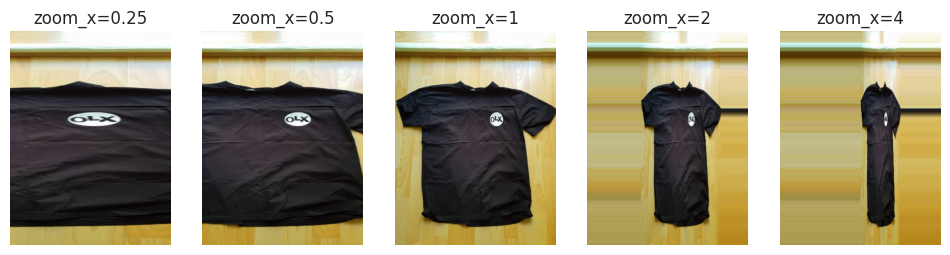

In [27]:
param = "zoom_x"
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(image, param, values, (12, 3))

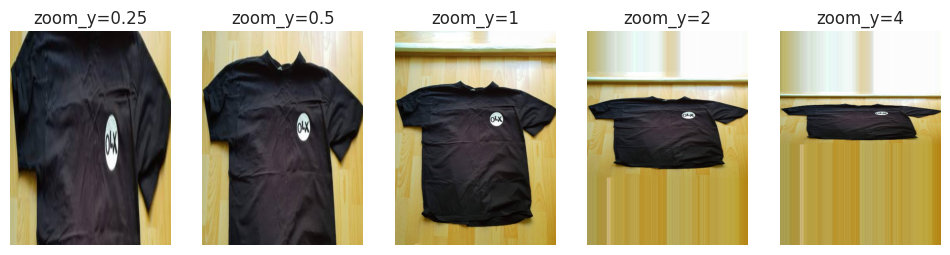

In [28]:
param = "zoom_y"
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(image, param, values, (12, 3))

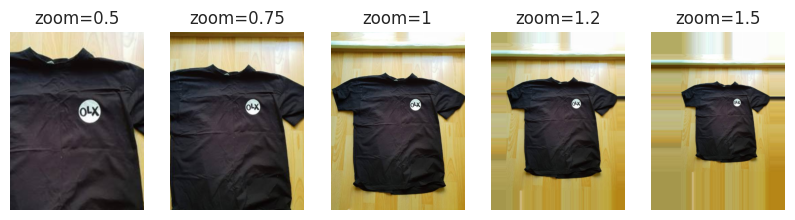

In [33]:
# Zooming x and y equally
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(image, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()

**Combining multiple Transformations**

- We don't need to implement it manually, we can use `ImageDataGenerator` for that

In [34]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [35]:
x = np.array(image)

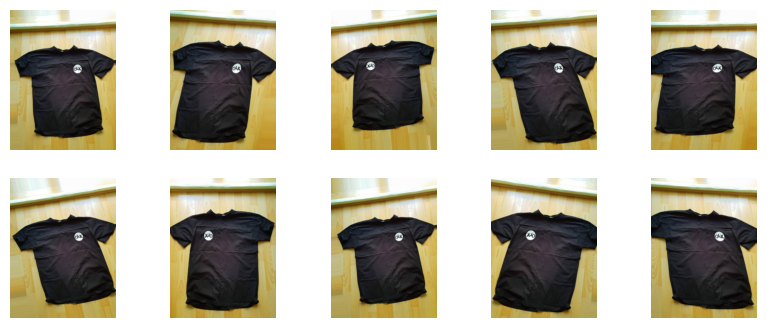

In [36]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

**Applying Data Augmentation to the ImageGenerator**

In [48]:
?ImageDataGenerator # for more information about the argumentation parameter

Object `ImageDataGenerator # for more information about the argumentation parameter` not found.


In [49]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rotation_range=30,       # [-30°, 30°]
    # width_shift_range=10.0,  # [-10, 10]
    # height_shift_range=10.0, # [-10, 10]
    shear_range=10.0,        #
    zoom_range=0.1,          # [1 - zoom_range, 1 + zoom_range] = [0.9, 1.1]
    vertical_flip=True       # Self Ex
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32
)

# Validation data is not transofrmed, since it represents the data that is
# provided by users of the machine learning application

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [51]:
learning_rate = 0.001
size = 100
droprate = 0.2
epochs = 50

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 42s 289ms/step - loss: 1.2560 - accuracy: 0.5802 - val_loss: 0.7935 - val_accuracy: 0.7478
Epoch 2/50
96/96 [==============================] - 26s 270ms/step - loss: 0.9256 - accuracy: 0.6910 - val_loss: 0.6570 - val_accuracy: 0.7713
Epoch 3/50
96/96 [==============================] - 26s 271ms/step - loss: 0.8048 - accuracy: 0.7331 - val_loss: 0.6204 - val_accuracy: 0.7977
Epoch 4/50
96/96 [==============================] - 28s 291ms/step - loss: 0.6932 - accuracy: 0.7634 - val_loss: 0.6139 - val_accuracy: 0.7977
Epoch 5/50
96/96 [==============================] - 25s 261ms/step - loss: 0.6386 - accuracy: 0.7865 - val_loss: 0.6255 - val_accuracy: 0.7947
Epoch 6/50
96/96 [==============================] - 26s 269ms/step - loss: 0.6056 - accuracy: 0.7907 - val_loss: 0.5855 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] - 27s 281ms/step - loss: 0.5532 - accuracy: 0.8096 - val_loss: 0.5460 - val_accuracy: 0.8152

## 8.11 Trainingm a larger model

- Train a $299\times299$ model

Previously we used a model with inputs of size `(150, 150)`. This was mainly for testing purposes, since a model with inputs of this size trains 4x faster than one with inputs of size `(299, 299)`.

In [52]:
def make_model(input_size=150,
               learning_rate=0.1,
               size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights="imagenet",
        include_top=False, # excluding dense-part
        input_shape=(input_size, input_size, 3)
    )

    # fix / freeze the base-model
    base_model.trainable = False

    #######################################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    # Adding dropout to the inner layer of the fully-connected part of the model
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [55]:
input_size = 299

In [56]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32
)

# Validation data is not transofrmed, since it represents the data that is
# provided by users of the machine learning application

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [54]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,    # only saves when model / monitored metric improves
    monitor="val_accuracy", # metric to monitor
    mode="max"              # what should be done with metric
)

xception_v1_12_0.824.h5


In [58]:
learning_rate = 0.001
size = 100
droprate = 0.2
epochs = 50

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[checkpoint]
  )

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 0.8453 - accuracy: 0.7304

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 86s 863ms/step - loss: 0.8453 - accuracy: 0.7304 - val_loss: 0.4393 - val_accuracy: 0.8651
Epoch 2/50
96/96 [==============================] - 79s 821ms/step - loss: 0.4601 - accuracy: 0.8400 - val_loss: 0.4006 - val_accuracy: 0.8622
Epoch 3/50
18/96 [====>.........................] - ETA: 1:10 - loss: 0.3960 - accuracy: 0.8889

KeyboardInterrupt: ignored

## 8.12 Using the model

- Loading the model
- Evaluating the model
- Getting predictions

## 8.13 Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scrath, we can use transfer learning and re-use already trained convolutional layers